<a href="https://colab.research.google.com/github/nehaljain21/Decision-Tree-Regressor/blob/main/Decision_tree_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving StudentPerformance.csv to StudentPerformance.csv


In [ ]:
import pandas as pd
df=pd.read_csv("StudentPerformance.csv")

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
df.shape

(6607, 20)

In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df.nunique()

,0
Hours_Studied,41
Attendance,41
Parental_Involvement,3
Access_to_Resources,3
Extracurricular_Activities,2
Sleep_Hours,7
Previous_Scores,51
Motivation_Level,3
Internet_Access,2
Tutoring_Sessions,9


In [ ]:
for col in ['Teacher_Quality','Parental_Education_Level','Distance_from_Home']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
print(df["School_Type"].unique())
print(df["Peer_Influence"].unique())
print(df["Parental_Education_Level"].unique())
print(df["Distance_from_Home"].unique())

['Public' 'Private']
['Positive' 'Negative' 'Neutral']
['High School' 'College' 'Postgraduate']
['Near' 'Moderate' 'Far']


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Extracurricular_Activities','School_Type','Internet_Access','Learning_Disabilities','Gender']:
    df[col] = le.fit_transform(df[col])

In [ ]:
ordinal_map = {'Low':1, 'Medium':2, 'High':3}
for col in ['Parental_Involvement','Access_to_Resources','Motivation_Level','Family_Income','Teacher_Quality']:
  df[col]=df[col].map(ordinal_map)
df['Peer_Influence'] = df['Peer_Influence'].map({"Negative":1,"Neutral":2,"Positive":3})
df['Parental_Education_Level'] = df['Parental_Education_Level'].map({"High School":1,"College":2,"Postgraduate":3})
df['Distance_from_Home'] = df['Distance_from_Home'].map({"Near":1,"Moderate":2,"Far":3})

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,3,3,0,1,1,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,1,4,0,2,2,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,2,4,0,3,1,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,1,4,0,1,2,1,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,2,4,0,2,1,0,70


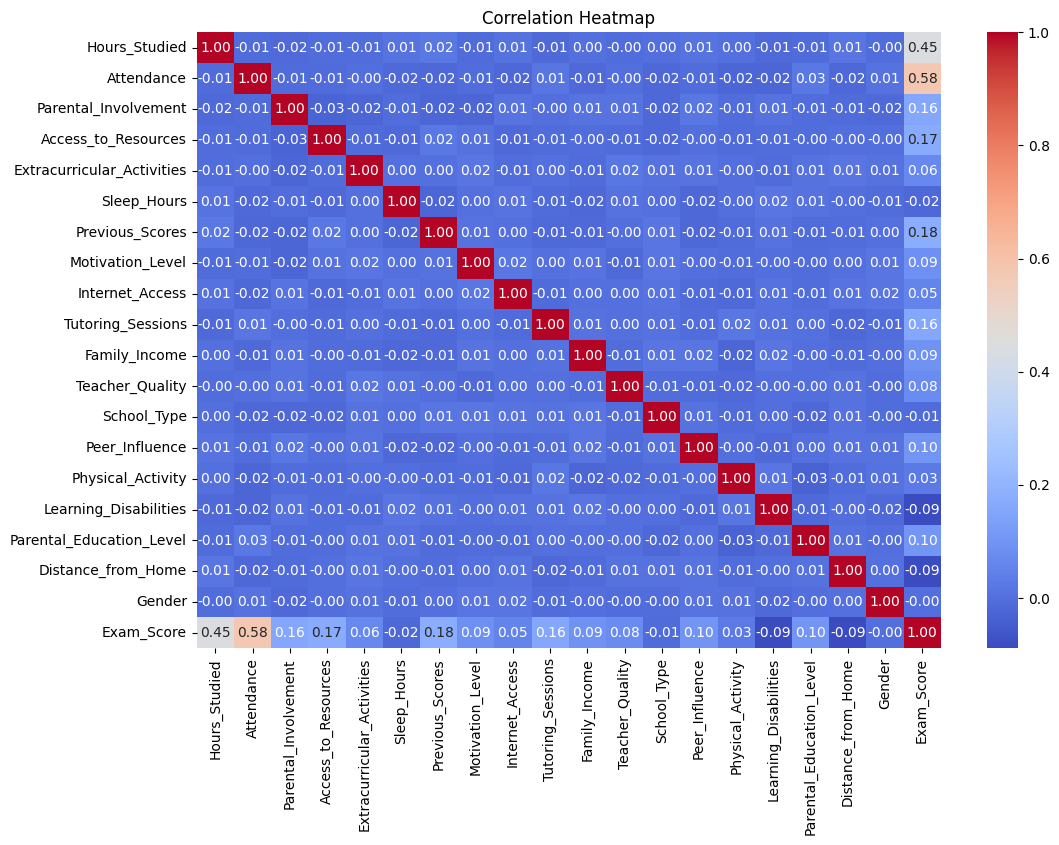

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
x = df[['Hours_Studied', 'Attendance','Parental_Involvement', 'Access_to_Resources','Previous_Scores','Tutoring_Sessions']]
y = df['Exam_Score']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error',max_depth=6,random_state=42)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 6.911965846693073
R² Score: 0.5265429947110896


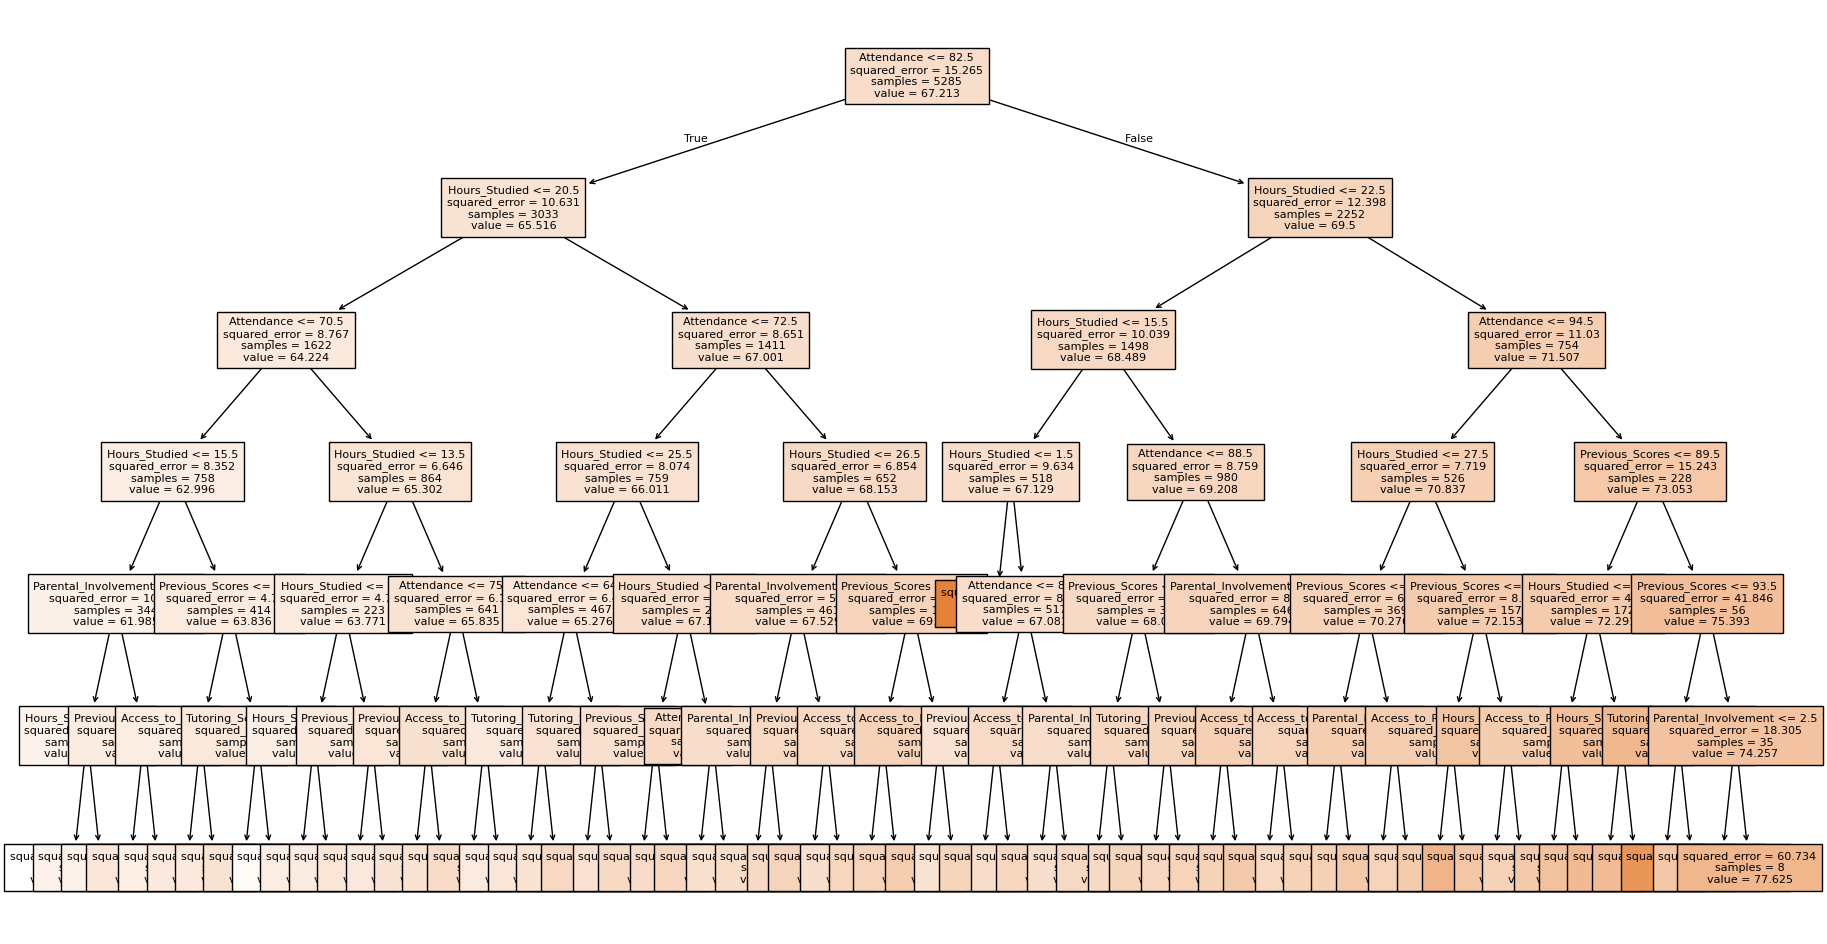

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(22,12))
tree.plot_tree(model,filled=True,feature_names=x.columns,fontsize=8)
plt.show()